In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')

In [2]:
def estimate_pi(n_throws):
    throws = np.random.uniform(low=-1, high=1, size=(n_throws, 2))
    return 4 * (np.linalg.norm(throws, axis=1) <= 1).sum() / n_throws

In [3]:
def estimate_pi_many_trials(n_throws, n_trials):
    throws = np.random.uniform(low=-1, high=1, size=(n_trials*n_throws, 2))
    indicators = (np.linalg.norm(throws, axis=1) <= 1).reshape((n_trials, n_throws))
    return 4 * indicators.sum(axis=1) / n_throws

In [6]:
estimates = estimate_pi_many_trials(100000, 1000)

Text(0.5,1,'Histogram of 1000 Trials (100K Throws Per Trial)')

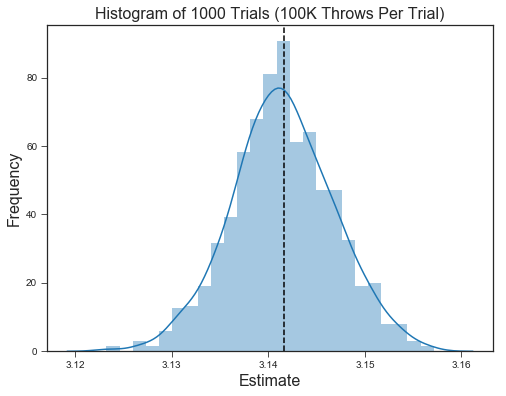

In [7]:
plt.figure(figsize=(8, 6))
sns.distplot(estimates)
plt.axvline(x=np.pi, linestyle='dashed', color='black')
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Estimate', fontsize=16)
plt.title("Histogram of 1000 Trials (100K Throws Per Trial)", fontsize=16)

In [8]:
def kl_div(x, y):
    return x * np.log(x / y) + (1-x) * np.log((1-x)/(1-y))

In [12]:
def compute_bound(h, eps, delta):
    assert h >= 2
    assert eps >= 0 and eps <= 1
    assert delta > 0 and delta < 1
    p = np.pi / (h**2)
    upper = 1/kl_div(p + eps/(h**2), p) * np.log(2/delta)
    lower = 1/kl_div(p - eps/(h**2), p) * np.log(2/delta)
    return max(upper, lower)

In [83]:
(compute_bound(2, 0.1, 0.05), 
 compute_bound(2, 0.01, 0.05),
 compute_bound(2, 0.001, 0.05))

(2043.8175641342291, 199520.38925119434, 19901703.863744855)

Text(0.5,1,'Samples Needed for Epsilon Accuracy with 95% Probability')

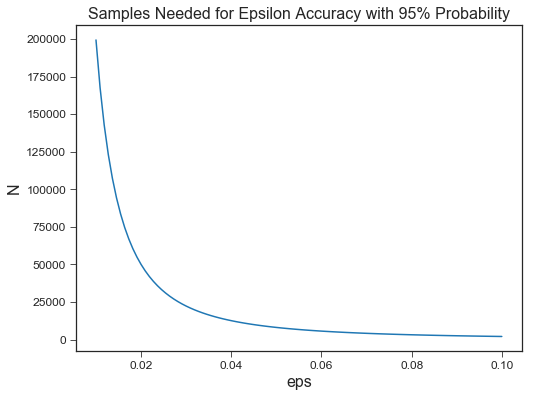

In [81]:
plt.figure(figsize=(8, 6))
eps = np.linspace(0.01, 0.1, 100)
eps_bounds = [compute_bound(2, ep, 0.05) for ep in eps]
plt.plot(eps, eps_bounds)
plt.xlabel("eps", fontsize=16)
plt.ylabel("N", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Samples Needed for Epsilon Accuracy with 95% Probability", fontsize=16)

Text(0.5,1,'Samples Needed for Epsilon Accurate Estimate with 95% Probability')

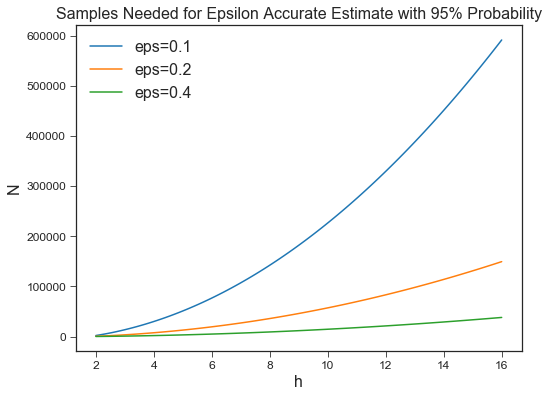

In [85]:
plt.figure(figsize=(8, 6))
hs = np.linspace(2, 16, 100)
bounds_01 = [compute_bound(h, 0.1, 0.05) for h in hs]
bounds_02 = [compute_bound(h, 0.2, 0.05) for h in hs]
bounds_04 = [compute_bound(h, 0.4, 0.05) for h in hs]
plt.plot(hs, bounds_01)
plt.plot(hs, bounds_02)
plt.plot(hs, bounds_04)
plt.legend(['eps=0.1', 'eps=0.2', 'eps=0.4'], fontsize=16)
plt.xlabel('h', fontsize=16)
plt.ylabel('N', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Samples Needed for Epsilon Accurate Estimate with 95% Probability", fontsize=16)

In [23]:
def estimate_pi_with_h(n_throws, h):
    assert h >= 2
    throws = np.random.uniform(low=-h/2, high=h/2, size=(n_throws, 2))
    return (h ** 2) * (np.linalg.norm(throws, axis=1) <= 1).sum() / n_throws

def estimate_pi_with_h_many_trials(n_throws, h, n_trials):
    assert h >= 2
    throws = np.random.uniform(low=-h/2, high=h/2, size=(n_trials*n_throws, 2))
    indicators = (np.linalg.norm(throws, axis=1) <= 1).reshape((n_trials, n_throws))
    return (h ** 2) * indicators.sum(axis=1) / n_throws

In [42]:
estimates_h_2 = estimate_pi_with_h_many_trials(20000, 2, 10000)

In [44]:
estimates_h_4 = estimate_pi_with_h_many_trials(20000, 4, 10000)

In [47]:
estimates_h_6 = estimate_pi_with_h_many_trials(20000, 6, 10000)

In [45]:
estimates_h_8 = estimate_pi_with_h_many_trials(20000, 8, 10000)

Text(0.5,1,'Histogram of 10K Trials (20K Throws Per Trial)')

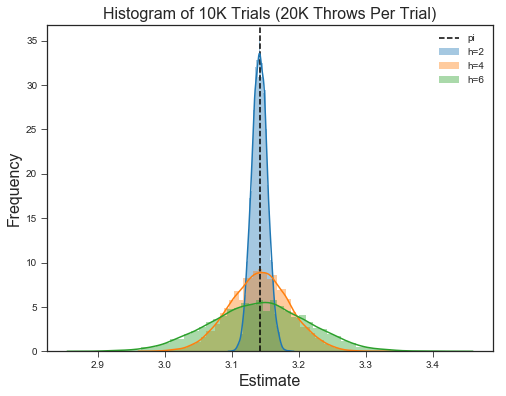

In [51]:
plt.figure(figsize=(8, 6))
plt.axvline(x=np.pi, linestyle='dashed', color='black')
sns.distplot(estimates_h_2)
sns.distplot(estimates_h_4)
sns.distplot(estimates_h_6)

plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Estimate', fontsize=16)
plt.legend(['pi', 'h=2', 'h=4', 'h=6'])
plt.title("Histogram of 10K Trials (20K Throws Per Trial)", fontsize=16)